# BOSTON 2016

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import itertools
%matplotlib inline

#Load files
boston = "Resources/boston_data_df3.csv"
full_moon = "Resources/full_moon.csv"


#Read file and store into pandas data frame
boston_df = pd.read_csv(boston, sep = ',')
full_moon_data_df = pd.read_csv(full_moon, sep = ',')


In [2]:
#Shorten  data frames to get just desired columns
#Boston
boston_crime_2016 = boston_df[['OCCURRED_ON_DATE','OFFENSE_CODE_GROUP' ,'OFFENSE_DESCRIPTION']].copy()
boston_crime_2016['OCCURRED_ON_DATE'] = pd.to_datetime(boston_crime_2016['OCCURRED_ON_DATE']).dt.normalize()
boston_crime_2016.rename(columns = {'OCCURRED_ON_DATE':'Crime Date', 'OFFENSE_CODE_GROUP':'Offense Description',
                                    'OFFENSE_DESCRIPTION':'Offense Specific' }, inplace = True)
boston_crime_drop = boston_crime_2016.drop('Offense Specific', 1)


#Full Moon
#fix columns by renaming (removing space before name)
full_moon_data_df.columns = ['Day', 'Calendar Date', 'Time']

#set column date as date_time and sort to get desired year
full_moon_data_df['Calendar Date']= pd.to_datetime(full_moon_data_df['Calendar Date'])
full_moon_2016 = full_moon_data_df[full_moon_data_df['Calendar Date'].dt.year == 2016]

In [3]:
#boston_crime_2016.head()
#full_moon_2016

## January Boston

In [4]:
#Boston Crime January Data
boston_crime_jan_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 1]
boston_crime_jan = boston_crime_jan_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_jan_24 = boston_crime_jan[boston_crime_jan['Crime Date'].dt.day == 24]

day_average = f'{((boston_crime_jan_24["Crime Date"].count()/boston_crime_jan["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_jan["Crime Date"].count()/31)}'

df_total_jan = pd.DataFrame(boston_crime_jan['Crime Date'].value_counts())
df_total_jan.columns = ['Reported Crime']
df_total_jan['Rank'] = df_total_jan['Reported Crime'].rank(ascending=0)
boston_jan_max = df_total_jan['Reported Crime'].max()
boston_jan_min = df_total_jan['Reported Crime'].min()


print(f'January in Boston:')
print(f'Total number of crimes reported: {boston_crime_jan["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_jan_max}')
print(f'The minimum crime committed on one day: {boston_jan_min}')
print(f'Total crime on full mon (Jan 24th): {boston_crime_jan_24["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/31')
#df_total_jan

January in Boston:
Total number of crimes reported: 7835
Average number of crimes per day for month: 252
The maximum crime committed on one day: 354
The minimum crime committed on one day: 184
Total crime on full mon (Jan 24th): 194
Percentage of monthy crime that occured on day of the full moon: 2.48%
Rank of crime on full moon: 28/31


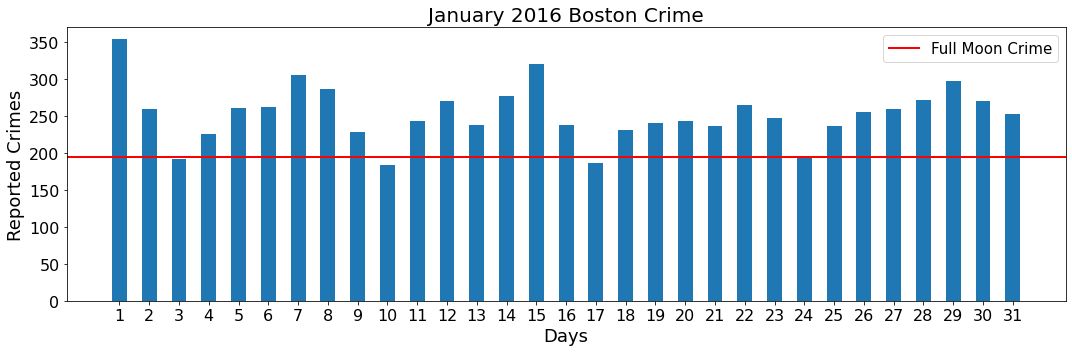

In [5]:
#Boston Crime January Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_jan['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('January 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=194, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_jan_2016.png')
plt.show()

## Feburary Boston

In [6]:
#Boston Crime February Data
boston_crime_feb_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 2]
boston_crime_feb = boston_crime_feb_unsorted.sort_values(by="Crime Date")

#To find value for day of full moon
boston_crime_feb_22 = boston_crime_feb[boston_crime_feb['Crime Date'].dt.day == 22]
#boston_crime_feb22.count()

day_average = f'{((boston_crime_feb_22["Crime Date"].count()/boston_crime_feb["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_feb["Crime Date"].count()/31)}'

df_total_feb = pd.DataFrame(boston_crime_feb['Crime Date'].value_counts())
df_total_feb.columns = ['Reported Crime']
df_total_feb['Rank'] = df_total_feb['Reported Crime'].rank(ascending=0)
boston_feb_max = df_total_feb['Reported Crime'].max()
boston_feb_min = df_total_feb['Reported Crime'].min()


print(f'February in Boston:')
print(f'Total number of crimes reported: {boston_crime_feb["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_feb_max}')
print(f'The minimum crime committed on one day: {boston_feb_min}')
print(f'Total crime on full mon (Feb 22nd): {boston_crime_feb_22["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 9.5/29')
#df_total_feb

February in Boston:
Total number of crimes reported: 7308
Average number of crimes per day for month: 235
The maximum crime committed on one day: 327
The minimum crime committed on one day: 166
Total crime on full mon (Feb 22nd): 267
Percentage of monthy crime that occured on day of the full moon: 3.65%
Rank of crime on full moon: 9.5/29


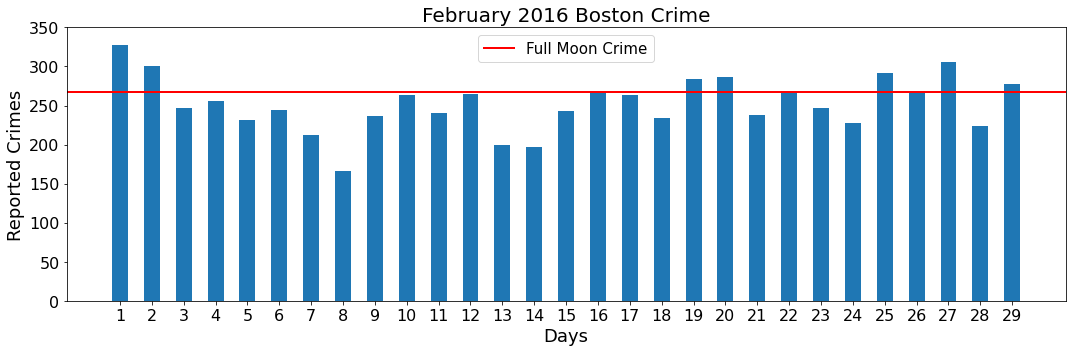

In [7]:
#Boston Crime February Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_feb['Crime Date'].value_counts().sort_index()
days_month= list(range(1,30))
x=list(range(1,30))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#Clean and Label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,350)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('February 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=267, color='r', linewidth=2)
plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_feb_2016.png')
plt.show()

## March Boston

In [8]:
#Boston Crime March Data
boston_crime_mar_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 3]
boston_crime_mar = boston_crime_mar_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_mar_23 = boston_crime_mar[boston_crime_mar['Crime Date'].dt.day == 23]

day_average = f'{((boston_crime_mar_23["Crime Date"].count()/boston_crime_mar["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_mar["Crime Date"].count()/31)}'

df_total_mar = pd.DataFrame(boston_crime_mar['Crime Date'].value_counts())
df_total_mar.columns = ['Reported Crime']
df_total_mar['Rank'] = df_total_mar['Reported Crime'].rank(ascending=0)
boston_mar_max = df_total_mar['Reported Crime'].max()
boston_mar_min = df_total_mar['Reported Crime'].min()


print(f'March in Boston:')
print(f'Total number of crimes reported: {boston_crime_mar["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_mar_max}')
print(f'The minimum crime committed on one day: {boston_mar_min}')
print(f'Total crime on full mon (mar 23th): {boston_crime_mar_23["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 18/31')
#df_total_mar

March in Boston:
Total number of crimes reported: 8199
Average number of crimes per day for month: 264
The maximum crime committed on one day: 308
The minimum crime committed on one day: 211
Total crime on full mon (mar 23th): 260
Percentage of monthy crime that occured on day of the full moon: 3.17%
Rank of crime on full moon: 18/31


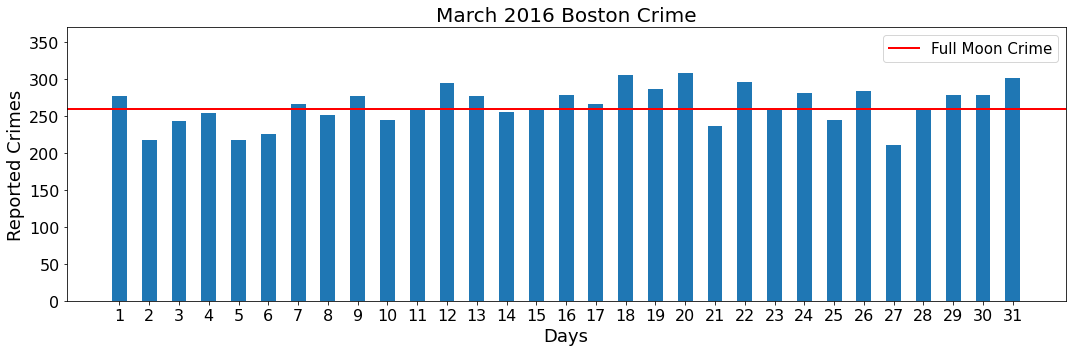

In [9]:
#Boston Crime March Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_mar['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('March 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=260, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_mar_2016.png')
plt.show()

## April Boston

In [10]:
#Boston Crime April Data
boston_crime_apr_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 4]
boston_crime_apr = boston_crime_apr_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_apr_22 = boston_crime_apr[boston_crime_apr['Crime Date'].dt.day == 22]

day_average = f'{((boston_crime_apr_22["Crime Date"].count()/boston_crime_apr["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_apr["Crime Date"].count()/31)}'

df_total_apr = pd.DataFrame(boston_crime_apr['Crime Date'].value_counts())
df_total_apr.columns = ['Reported Crime']
df_total_apr['Rank'] = df_total_apr['Reported Crime'].rank(ascending=0)
boston_apr_max = df_total_apr['Reported Crime'].max()
boston_apr_min = df_total_apr['Reported Crime'].min()


print(f'April in Boston:')
print(f'Total number of crimes reported: {boston_crime_apr["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_apr_max}')
print(f'The minimum crime committed on one day: {boston_apr_min}')
print(f'Total crime on full mon (apr 22th): {boston_crime_apr_22["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 25/30')
#df_total_apr

April in Boston:
Total number of crimes reported: 8101
Average number of crimes per day for month: 261
The maximum crime committed on one day: 353
The minimum crime committed on one day: 221
Total crime on full mon (apr 22th): 245
Percentage of monthy crime that occured on day of the full moon: 3.02%
Rank of crime on full moon: 25/30


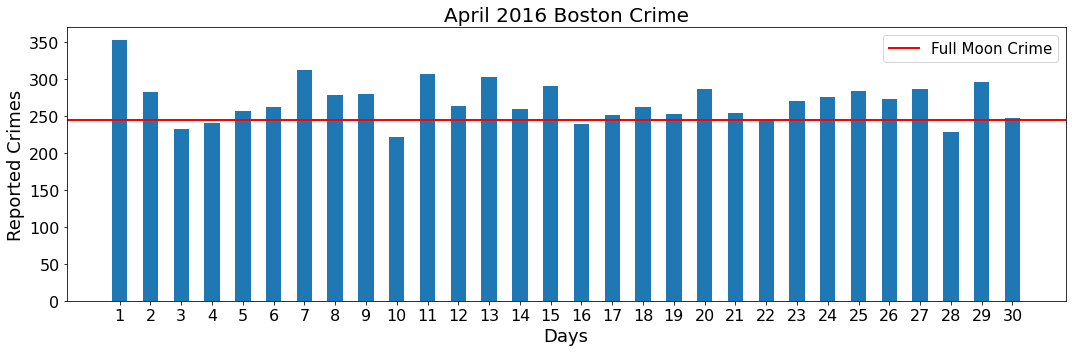

In [11]:
#Boston Crime April Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_apr['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('April 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=245, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_apr_2016.png')
plt.show()

## May Boston

In [12]:
#Boston Crime May Data
boston_crime_may_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 5]
boston_crime_may = boston_crime_may_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_may_21 = boston_crime_may[boston_crime_may['Crime Date'].dt.day == 21]

day_average = f'{((boston_crime_may_21["Crime Date"].count()/boston_crime_may["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_may["Crime Date"].count()/31)}'

df_total_may = pd.DataFrame(boston_crime_may['Crime Date'].value_counts())
df_total_may.columns = ['Reported Crime']
df_total_may['Rank'] = df_total_may['Reported Crime'].rank(ascending=0)
boston_may_max = df_total_may['Reported Crime'].max()
boston_may_min = df_total_may['Reported Crime'].min()


print(f'May in Boston:')
print(f'Total number of crimes reported: {boston_crime_may["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_may_max}')
print(f'The minimum crime committed on one day: {boston_may_min}')
print(f'Total crime on full mon (may 21st): {boston_crime_may_21["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 12.5/31')
#df_total_may


May in Boston:
Total number of crimes reported: 8578
Average number of crimes per day for month: 276
The maximum crime committed on one day: 337
The minimum crime committed on one day: 225
Total crime on full mon (may 21st): 286
Percentage of monthy crime that occured on day of the full moon: 3.33%
Rank of crime on full moon: 12.5/31


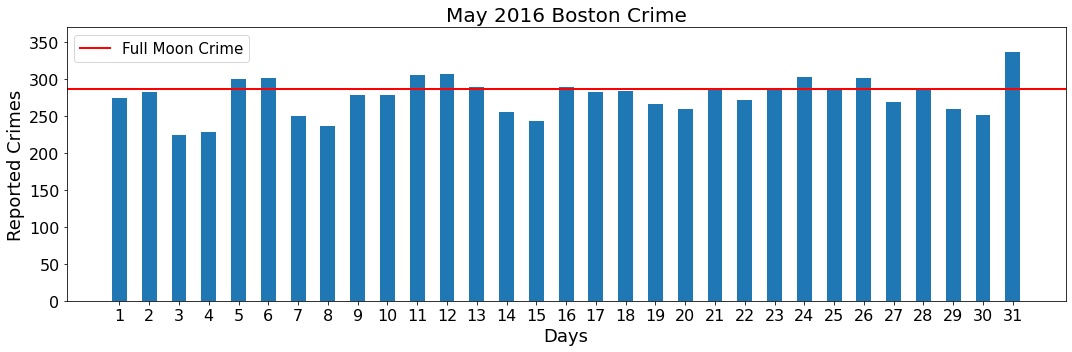

In [13]:
#Boston Crime May Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_may['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('May 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=286, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_may_2016.png')
plt.show()

## June Boston

In [14]:

#Boston Crime June Data
boston_crime_june_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 6]
boston_crime_june = boston_crime_june_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_june_20 = boston_crime_june[boston_crime_june['Crime Date'].dt.day == 20]

day_average = f'{((boston_crime_june_20["Crime Date"].count()/boston_crime_june["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_june["Crime Date"].count()/31)}'

df_total_june = pd.DataFrame(boston_crime_june['Crime Date'].value_counts())
df_total_june.columns = ['Reported Crime']
df_total_june['Rank'] = df_total_june['Reported Crime'].rank(ascending=0)
boston_june_max = df_total_june['Reported Crime'].max()
boston_june_min = df_total_june['Reported Crime'].min()


print(f'June in Boston:')
print(f'Total number of crimes reported: {boston_crime_june["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_june_max}')
print(f'The minimum crime committed on one day: {boston_june_min}')
print(f'Total crime on full mon (june 20th): {boston_crime_june_20["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 9/30')
#df_total_june

June in Boston:
Total number of crimes reported: 8558
Average number of crimes per day for month: 276
The maximum crime committed on one day: 336
The minimum crime committed on one day: 234
Total crime on full mon (june 20th): 307
Percentage of monthy crime that occured on day of the full moon: 3.59%
Rank of crime on full moon: 9/30


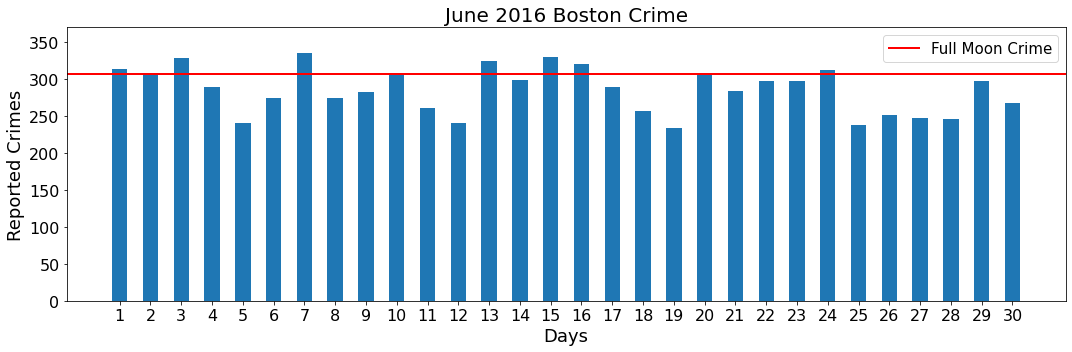

In [15]:
#Boston Crime June Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_june['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('June 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=307, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_june_2016.png')
plt.show()

## July Boston

In [16]:

#Boston Crime July Data
boston_crime_july_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 7]
boston_crime_july = boston_crime_july_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_july_20 = boston_crime_july[boston_crime_july['Crime Date'].dt.day == 20]

day_average = f'{((boston_crime_july_20["Crime Date"].count()/boston_crime_july["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_july["Crime Date"].count()/31)}'

df_total_july = pd.DataFrame(boston_crime_july['Crime Date'].value_counts())
df_total_july.columns = ['Reported Crime']
df_total_july['Rank'] = df_total_july['Reported Crime'].rank(ascending=0)
boston_july_max = df_total_july['Reported Crime'].max()
boston_july_min = df_total_july['Reported Crime'].min()


print(f'July in Boston:')
print(f'Total number of crimes reported: {boston_crime_july["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_july_max}')
print(f'The minimum crime committed on one day: {boston_july_min}')
print(f'Total crime on full mon (july 20th): {boston_crime_july_20["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 20.5/31')
#df_total_july

July in Boston:
Total number of crimes reported: 8619
Average number of crimes per day for month: 278
The maximum crime committed on one day: 319
The minimum crime committed on one day: 230
Total crime on full mon (july 20th): 270
Percentage of monthy crime that occured on day of the full moon: 3.13%
Rank of crime on full moon: 20.5/31


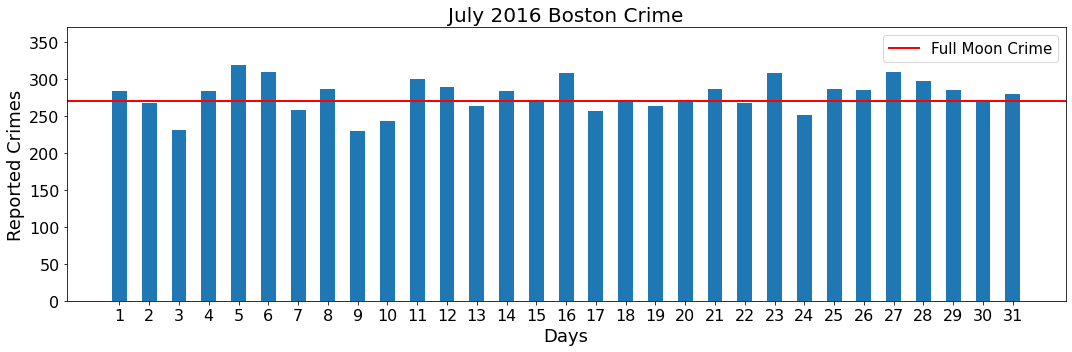

In [17]:
#Boston Crime July Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_july['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('July 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=270, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_july_2016.png')
plt.show()

## August Boston

In [18]:
#Boston Crime August Data
boston_crime_aug_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 8]
boston_crime_aug = boston_crime_aug_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_aug_18 = boston_crime_aug[boston_crime_aug['Crime Date'].dt.day == 18]

day_average = f'{((boston_crime_aug_18["Crime Date"].count()/boston_crime_aug["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_aug["Crime Date"].count()/31)}'

df_total_aug = pd.DataFrame(boston_crime_aug['Crime Date'].value_counts())
df_total_aug.columns = ['Reported Crime']
df_total_aug['Rank'] = df_total_aug['Reported Crime'].rank(ascending=0)
boston_aug_max = df_total_aug['Reported Crime'].max()
boston_aug_min = df_total_aug['Reported Crime'].min()


print(f'August in Boston:')
print(f'Total number of crimes reported: {boston_crime_aug["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_aug_max}')
print(f'The minimum crime committed on one day: {boston_aug_min}')
print(f'Total crime on full mon (aug 18th): {boston_crime_aug_18["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 6.5/31')
#df_total_aug

August in Boston:
Total number of crimes reported: 8938
Average number of crimes per day for month: 288
The maximum crime committed on one day: 336
The minimum crime committed on one day: 246
Total crime on full mon (aug 18th): 310
Percentage of monthy crime that occured on day of the full moon: 3.47%
Rank of crime on full moon: 6.5/31


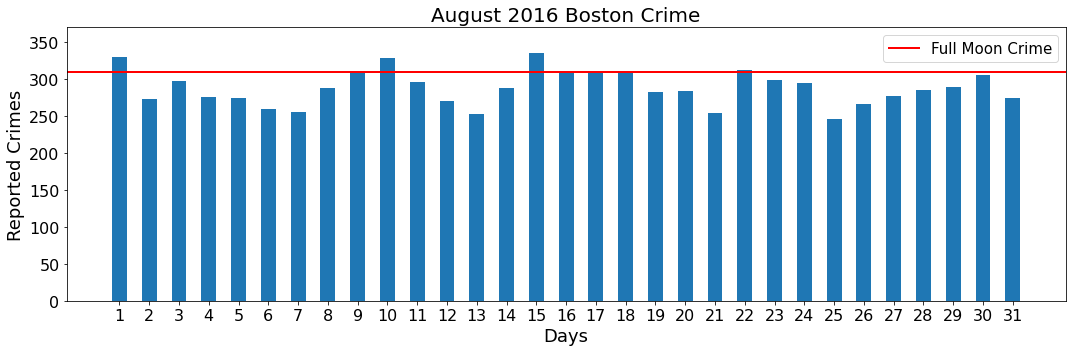

In [19]:
#Boston Crime August Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_aug['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('August 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=310, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_aug_2016.png')
plt.show()

## September Boston

In [20]:
#Boston Crime September Data
boston_crime_sept_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 9]
boston_crime_sept = boston_crime_sept_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_sept_16 = boston_crime_sept[boston_crime_sept['Crime Date'].dt.day == 16]

day_average = f'{((boston_crime_sept_16["Crime Date"].count()/boston_crime_sept["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_sept["Crime Date"].count()/31)}'

df_total_sept = pd.DataFrame(boston_crime_sept['Crime Date'].value_counts())
df_total_sept.columns = ['Reported Crime']
df_total_sept['Rank'] = df_total_sept['Reported Crime'].rank(ascending=0)
boston_sept_max = df_total_sept['Reported Crime'].max()
boston_sept_min = df_total_sept['Reported Crime'].min()


print(f'September in Boston:')
print(f'Total number of crimes reported: {boston_crime_sept["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_sept_max}')
print(f'The minimum crime committed on one day: {boston_sept_min}')
print(f'Total crime on full mon (sept 16th): {boston_crime_sept_16["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 2/30')
#df_total_sept

September in Boston:
Total number of crimes reported: 8522
Average number of crimes per day for month: 274
The maximum crime committed on one day: 378
The minimum crime committed on one day: 236
Total crime on full mon (sept 16th): 354
Percentage of monthy crime that occured on day of the full moon: 4.15%
Rank of crime on full moon: 2/30


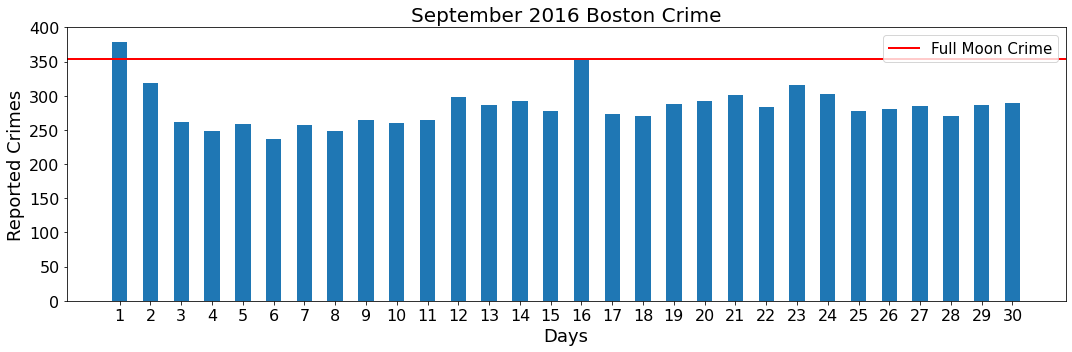

In [21]:
#Boston Crime September Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_sept['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,400)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('September 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=354, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_septd_2016.png')
plt.show()

## October Boston

In [22]:
#Boston Crime October Data
boston_crime_oct_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 10]
boston_crime_oct = boston_crime_oct_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_oct_16 = boston_crime_oct[boston_crime_oct['Crime Date'].dt.day == 16]

day_average = f'{((boston_crime_oct_16["Crime Date"].count()/boston_crime_oct["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_oct["Crime Date"].count()/31)}'

df_total_oct = pd.DataFrame(boston_crime_oct['Crime Date'].value_counts())
df_total_oct.columns = ['Reported Crime']
df_total_oct['Rank'] = df_total_oct['Reported Crime'].rank(ascending=0)
boston_oct_max = df_total_oct['Reported Crime'].max()
boston_oct_min = df_total_oct['Reported Crime'].min()


print(f'October in Boston:')
print(f'Total number of crimes reported: {boston_crime_oct["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_oct_max}')
print(f'The minimum crime committed on one day: {boston_oct_min}')
print(f'Total crime on full mon (oct 16th): {boston_crime_oct_16["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 29.5/31')
#df_total_oct

October in Boston:
Total number of crimes reported: 8583
Average number of crimes per day for month: 276
The maximum crime committed on one day: 345
The minimum crime committed on one day: 229
Total crime on full mon (oct 16th): 239
Percentage of monthy crime that occured on day of the full moon: 2.78%
Rank of crime on full moon: 29.5/31


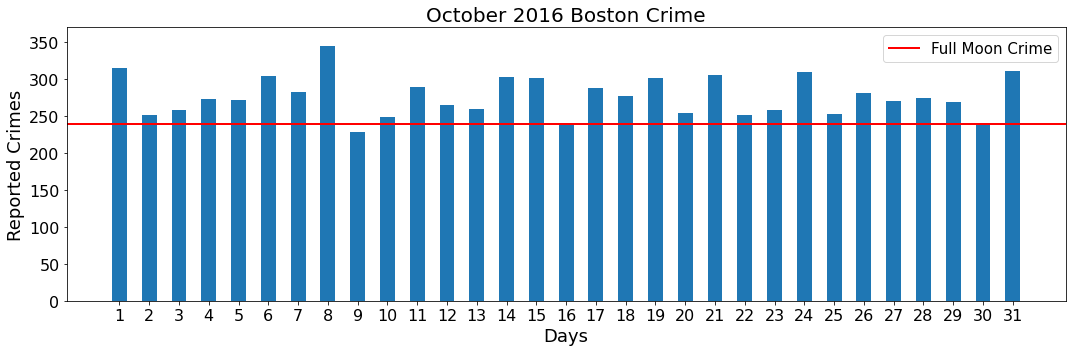

<Figure size 432x288 with 0 Axes>

In [23]:
#Boston Crime October Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_oct['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('October 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=239, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()
plt.show()

plt.savefig('boston_images/boston_oct_2016.png')
plt.show()

## Novermber Boston

In [24]:
#Boston Crime November Data
boston_crime_nov_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 11]
boston_crime_nov = boston_crime_nov_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_nov_14 = boston_crime_nov[boston_crime_nov['Crime Date'].dt.day == 14]

day_average = f'{((boston_crime_nov_14["Crime Date"].count()/boston_crime_nov["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_nov["Crime Date"].count()/31)}'

df_total_nov = pd.DataFrame(boston_crime_nov['Crime Date'].value_counts())
df_total_nov.columns = ['Reported Crime']
df_total_nov['Rank'] = df_total_nov['Reported Crime'].rank(ascending=0)
boston_nov_max = df_total_nov['Reported Crime'].max()
boston_nov_min = df_total_nov['Reported Crime'].min()


print(f'November in Boston:')
print(f'Total number of crimes reported: {boston_crime_nov["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_nov_max}')
print(f'The minimum crime committed on one day: {boston_nov_min}')
print(f'Total crime on full mon (nov 14th): {boston_crime_nov_14["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 21/30')
#df_total_nov

November in Boston:
Total number of crimes reported: 7922
Average number of crimes per day for month: 255
The maximum crime committed on one day: 344
The minimum crime committed on one day: 149
Total crime on full mon (nov 14th): 254
Percentage of monthy crime that occured on day of the full moon: 3.21%
Rank of crime on full moon: 21/30


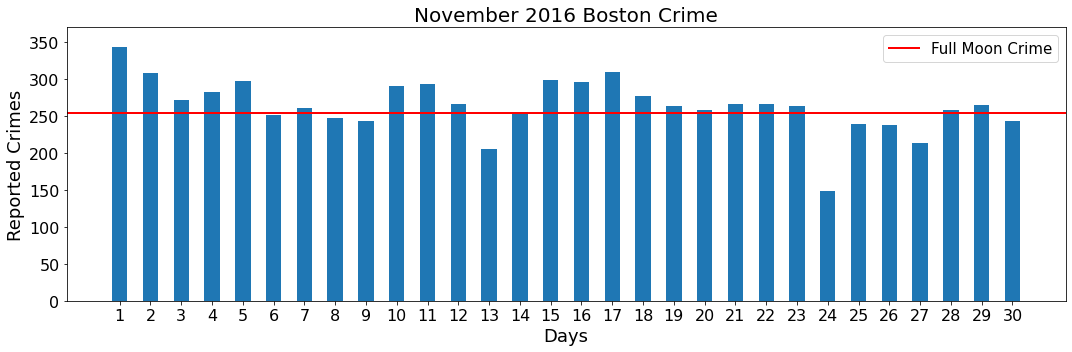

In [25]:
#Boston Crime November Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_nov['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('November 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=254, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_nov_2016.png')
plt.show()

## December Boston

In [26]:
#Boston Crime December Data
boston_crime_dec_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 12]
boston_crime_dec = boston_crime_dec_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_dec_14 = boston_crime_dec[boston_crime_dec['Crime Date'].dt.day == 14]

day_average = f'{((boston_crime_dec_14["Crime Date"].count()/boston_crime_dec["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_dec["Crime Date"].count()/31)}'

df_total_dec = pd.DataFrame(boston_crime_dec['Crime Date'].value_counts())
df_total_dec.columns = ['Reported Crime']
df_total_dec['Rank'] = df_total_dec['Reported Crime'].rank(ascending=0)
boston_dec_max = df_total_dec['Reported Crime'].max()
boston_dec_min = df_total_dec['Reported Crime'].min()


print(f'December in Boston:')
print(f'Total number of crimes reported: {boston_crime_dec["Crime Date"].count()}')
print(f'Average number of crimes per day for month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_dec_max}')
print(f'The minimum crime committed on one day: {boston_dec_min}')
print(f'Total crime on full mon (dec 14th): {boston_crime_dec_14["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 22/31')
#df_total_dec

December in Boston:
Total number of crimes reported: 7951
Average number of crimes per day for month: 256
The maximum crime committed on one day: 315
The minimum crime committed on one day: 140
Total crime on full mon (dec 14th): 248
Percentage of monthy crime that occured on day of the full moon: 3.12%
Rank of crime on full moon: 22/31


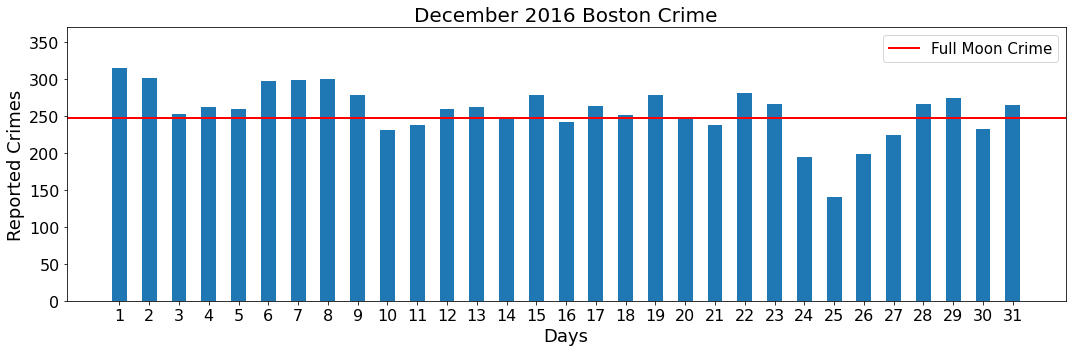

In [27]:
#Boston Crime December Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_dec['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('December 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=248, color='r', linewidth=2)

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('boston_images/boston_dec_2016.png')
plt.show()

In [28]:
#Boston crime over the year
full_moon_jan =int(boston_crime_jan_24["Crime Date"].count())
full_moon_feb =int(boston_crime_feb_22["Crime Date"].count())
full_moon_mar =int(boston_crime_mar_23["Crime Date"].count())
full_moon_apr =int(boston_crime_apr_22["Crime Date"].count())
full_moon_may =int(boston_crime_may_21["Crime Date"].count())
full_moon_june =int(boston_crime_june_20["Crime Date"].count())
full_moon_july =int(boston_crime_july_20["Crime Date"].count())
full_moon_aug =int(boston_crime_aug_18["Crime Date"].count())
full_moon_sept =int(boston_crime_sept_16["Crime Date"].count())
full_moon_oct =int(boston_crime_oct_16["Crime Date"].count())
full_moon_nov =int(boston_crime_nov_14["Crime Date"].count())
full_moon_dec =int(boston_crime_dec_14["Crime Date"].count())

boston_year_crime = pd.DataFrame([['Jan', full_moon_jan, boston_jan_max, boston_jan_min],
                                  ['Feb', full_moon_feb, boston_feb_max, boston_feb_min],
                                  ['Mar', full_moon_mar, boston_mar_max, boston_mar_min],
                                  ['Apr', full_moon_apr, boston_apr_max, boston_apr_min],
                                  ['May', full_moon_may, boston_may_max, boston_may_min],
                                  ['June', full_moon_june, boston_june_max, boston_june_min],
                                  ['July', full_moon_july, boston_july_max, boston_july_min],
                                  ['Aug', full_moon_aug, boston_aug_max, boston_aug_min],
                                  ['Sept', full_moon_sept, boston_sept_max, boston_sept_min],
                                  ['Oct', full_moon_oct, boston_oct_max, boston_oct_min],
                                  ['Nov', full_moon_nov, boston_nov_max, boston_nov_min],
                                  ['Dec', full_moon_dec, boston_dec_max, boston_dec_min]],
                                columns=["Month", "Full Moon", "Max", "Min"])
                                
boston_year_crime

,Month,Full Moon,Max,Min
0,Jan,194,354,184
1,Feb,267,327,166
2,Mar,260,308,211
3,Apr,245,353,221
4,May,286,337,225
5,June,307,336,234
6,July,270,319,230
7,Aug,310,336,246
8,Sept,354,378,236
9,Oct,239,345,229


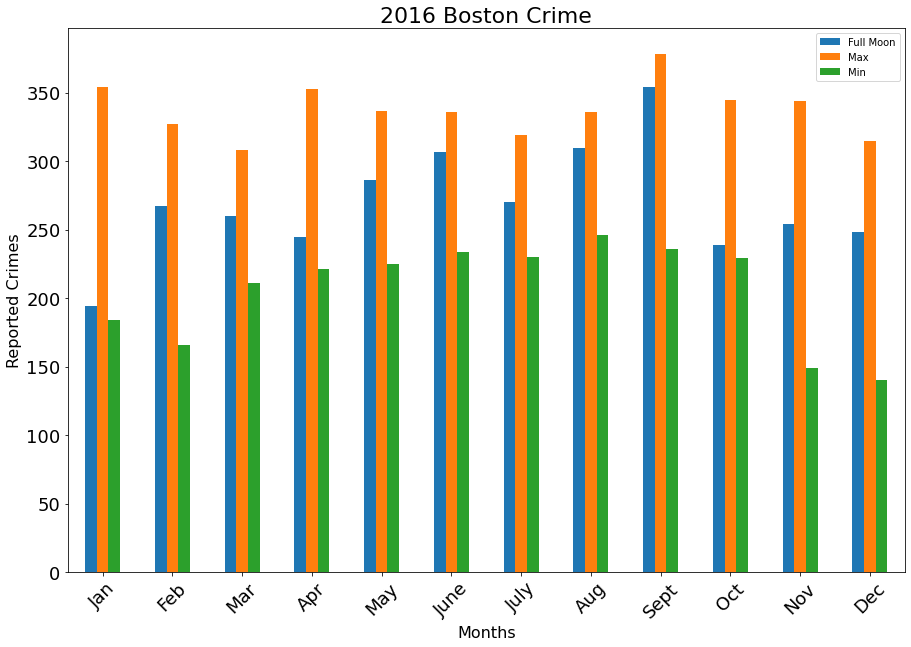

In [29]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec' ]
y = (range(0, 12))

ax = boston_year_crime[['Full Moon','Max', 'Min']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=18, rot=45)
ax.set_xticks(y)
ax.set_xticklabels(labels)

plt.xlabel('Months', fontsize=16)
plt.ylabel('Reported Crimes', fontsize=16)
plt.title('2016 Boston Crime', fontsize=22)


plt.savefig('boston_images/boston_2016_compare.png')
plt.show()

In [30]:
boston_total_crime_2016 = int(boston_crime_drop['Crime Date'].count())
boston_full_moon_total_crime = (full_moon_jan + full_moon_feb + full_moon_mar + full_moon_apr + 
                                full_moon_may + full_moon_june + full_moon_july + full_moon_aug + 
                                full_moon_sept + full_moon_oct + full_moon_nov + full_moon_dec) 
print(boston_total_crime_2016)
print(boston_full_moon_total_crime)

99114
3234


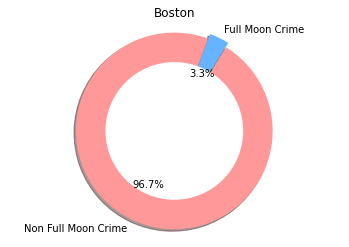

12 of 366 days is 3.28 percent of the yearly value
This shows that the full moon days combined is the same as the average day for the year


In [31]:
# plot each pie chart in a separate subplot
sizes = [(boston_total_crime_2016-boston_full_moon_total_crime), boston_full_moon_total_crime]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non Full Moon Crime', 'Full Moon Crime'

colors = ['#ff9999', '#66b3ff']
explode = (0, 0.05) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=70, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Boston")

plt.savefig('boston_images/boston_total_crime.png')
plt.show()

print(f'12 of 366 days is 3.28 percent of the yearly value')
print(f'This shows that the full moon days combined is the same as the average day for the year')
